In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, "../../")
from topological_codes import XZZXQubit
from qiskit import execute, Aer, QuantumCircuit, QuantumRegister

In [4]:
qubit = XZZXQubit({"d":3},"t")
qubit.logical_z_plus_reset()
qubit.stabilize()
qubit.stabilize()
qubit.logical_x()
qubit.readout_z()

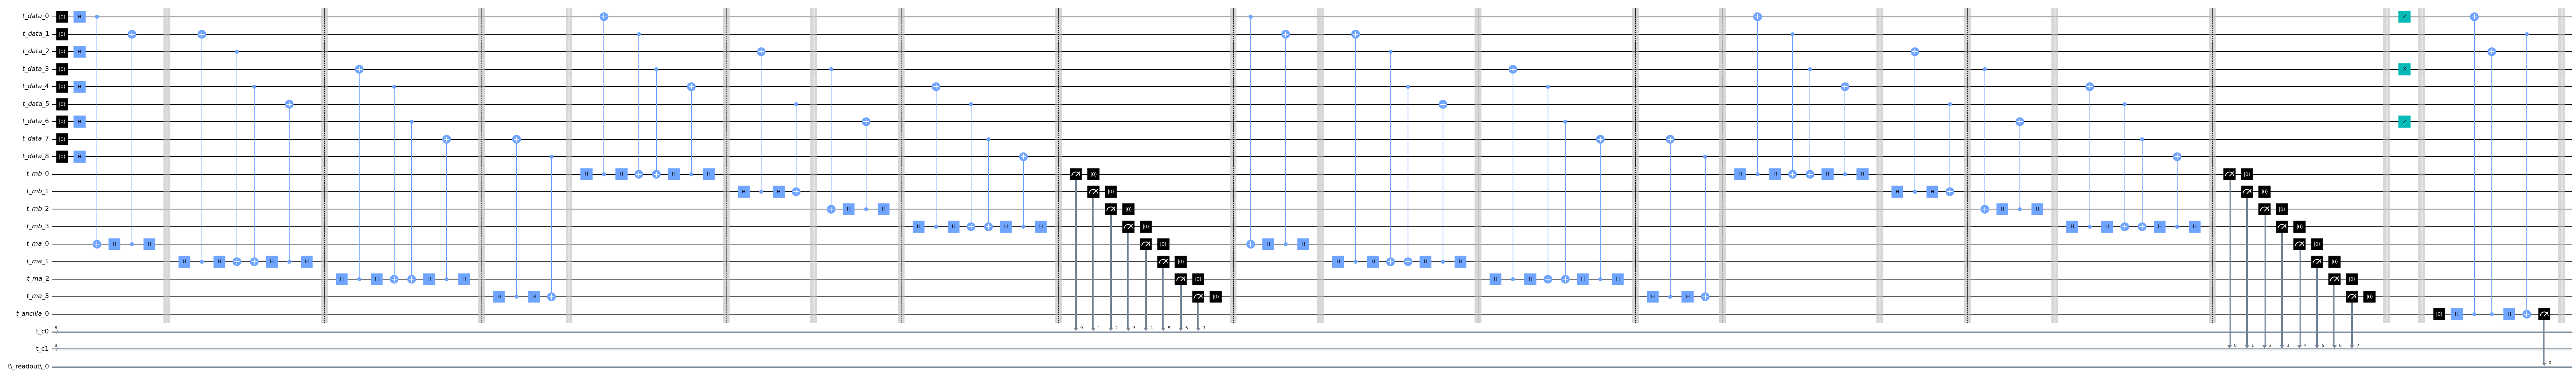

In [5]:
qubit.draw(output='mpl', fold=150)

In [6]:
results = execute(qubit.circ, Aer.get_backend('qasm_simulator'), shots=10000).result().get_counts()
results

{'1 00000000 00000000': 611,
 '1 00010000 00010000': 591,
 '1 00100000 00100000': 611,
 '1 00110000 00110000': 680,
 '1 01000000 01000000': 619,
 '1 01010000 01010000': 654,
 '1 01100000 01100000': 668,
 '1 01110000 01110000': 661,
 '1 10000000 10000000': 599,
 '1 10010000 10010000': 621,
 '1 10100000 10100000': 611,
 '1 10110000 10110000': 620,
 '1 11000000 11000000': 589,
 '1 11010000 11010000': 611,
 '1 11100000 11100000': 652,
 '1 11110000 11110000': 602}

# Lattice Readout

In [33]:
qubit = XZZXQubit({'d':5})
qubit.logical_z_plus_reset()
qubit.stabilize()
qubit.circ.x(0)
qubit.circ.z(0)
qubit.stabilize()
qubit.circ.x(0)
qubit.circ.z(0) #this will not be detected, but that's ok!
qubit.lattice_readout_z()

In [35]:
results = execute(qubit.circ, Aer.get_backend('qasm_simulator'), shots=1).result().get_counts()
readout_string = list(results.keys())[0]
print("Readout String: ", readout_string.split(" ")[0])
logical_readout, syndromes = qubit.parse_readout(readout_string, "Z")
print("Logical Readout: ", logical_readout)
print("Syndromes: \n", syndromes)

Readout String:  1001010100110000011000101
Logical Readout:  0
Syndromes: 
 {'A': [(0.0, -0.5, 0.5)], 'B': [(0.0, 0.5, 0.5), (1.0, 0.5, 0.5)]}
